In [1]:
using BasisFunctions
using FrameFuns
using PyPlot
using Interact, Reactive

  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:157


### One-dimensional approximations

In [2]:
B = FourierBasis(61);
D = Interval(-0.5,0.5);
f1(x) = x
F1 = Fun(f1,B,D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in require at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/roelmatthysen/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /U

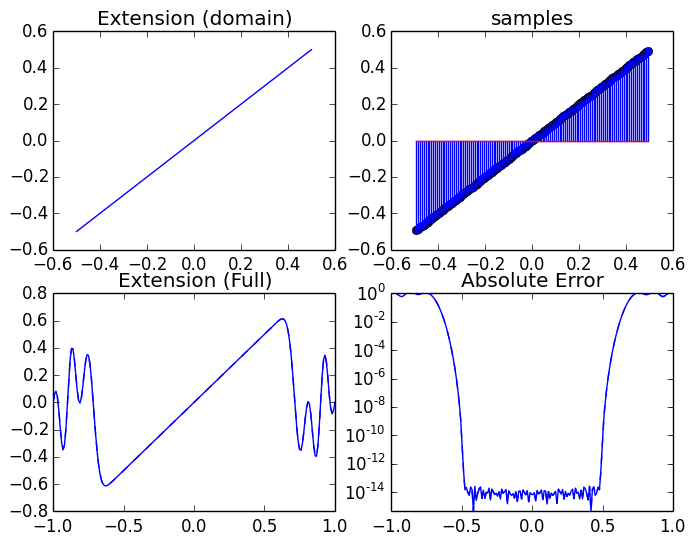

PyObject <matplotlib.text.Text object at 0x31c468790>

In [3]:
subplot(221); FrameFuns.plot(F1)
subplot(222); plot_samples(F1)
subplot(223); plot_expansion(F1)
subplot(224); plot_error(F1,f1)

In [4]:
F(0.5)

LoadError: LoadError: UndefVarError: F not defined
while loading In[4], in expression starting on line 1

In [5]:
f2(x) = cos(50*x)
F2 = Fun(f2, B, D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


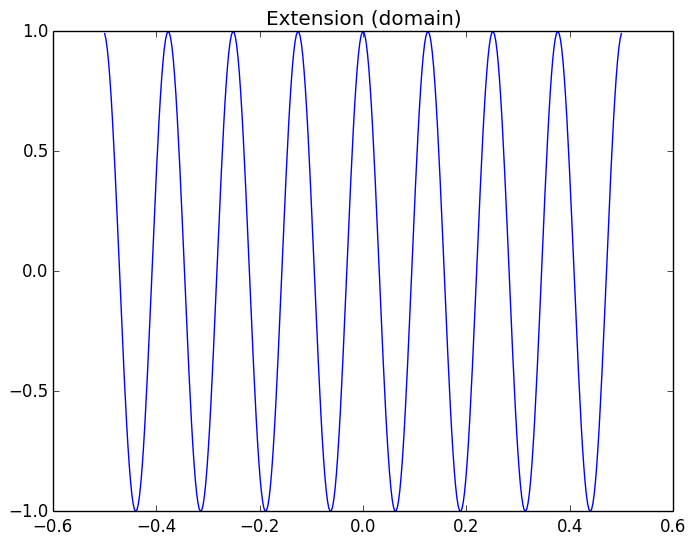

PyObject <matplotlib.text.Text object at 0x31c93d9d0>

In [6]:
FrameFuns.plot(F2,n=400)

In [7]:
f3(x) = cos(10*x.^2)
B = ChebyshevBasis(41)
D = Interval(-0.9,0.9)
F3 = Fun(f3,B,D)

A 1-dimensional FrameFun with 41 degrees of freedom.
Basis: Chebyshev series (first kind)
Domain: the interval [-0.9, 0.9]


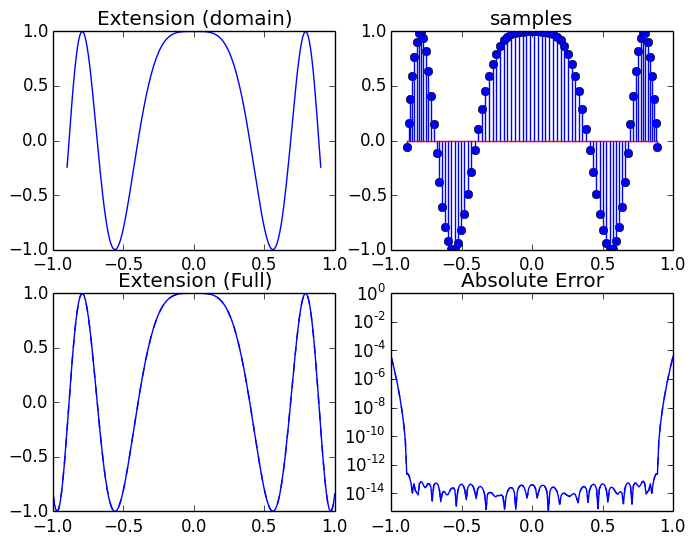

PyObject <matplotlib.text.Text object at 0x31cfb7350>

In [8]:
subplot(221); FrameFuns.plot(F3)
subplot(222); plot_samples(F3)
subplot(223); plot_expansion(F3)
subplot(224); plot_error(F3,f3)

Interact.Slider{Float64}([Reactive.Input{Float64}] 1.9700000000000002,"myT",1.9700000000000002,1.02:0.05:2.97)

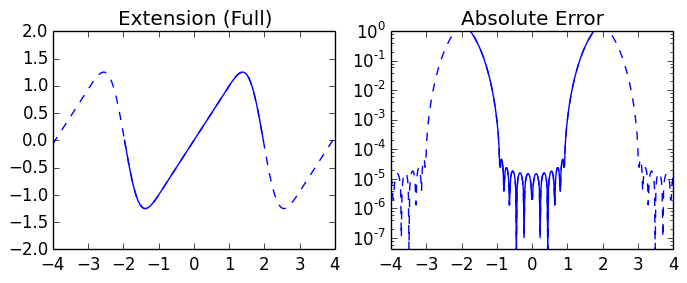

In [9]:
h=figure()
D = Interval(-1.0,1.0)
@manipulate for myT=1.02:0.05:3.0; withfig(h) do
        B = rescale(FourierBasis(11),-myT,myT)
        F=Fun(f1,B,D)
        subplot(221); plot_expansion(F,repeats=1); xlim([-4; 4]); ylim([-2; 2])
        subplot(222); plot_error(F, f1,repeats=1); xlim([-4; 4]); ylim([-10^16; 1])
    end
end

### High precision

In [10]:
B = FourierBasis(61,Complex{BigFloat})
D = Interval(-0.5,0.5)
fh(x) = x
Fh = Fun(fh,B,D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


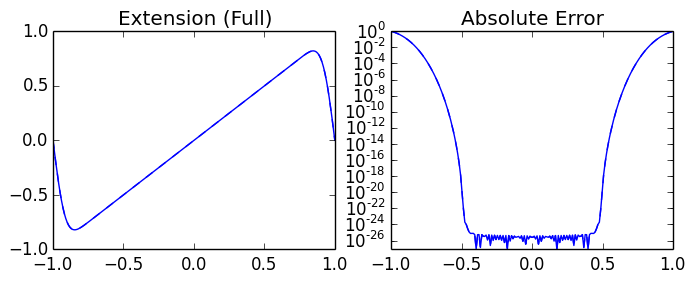

PyObject <matplotlib.text.Text object at 0x31d643210>

In [11]:
subplot(221); plot_expansion(Fh)
subplot(222); plot_error(Fh,fh)

FrameFuns.FE_DirectSolver{ELT,SRC,DEST}

fh (generic function with 1 method)

### 2D approximations

##### Simple domains and simple functions

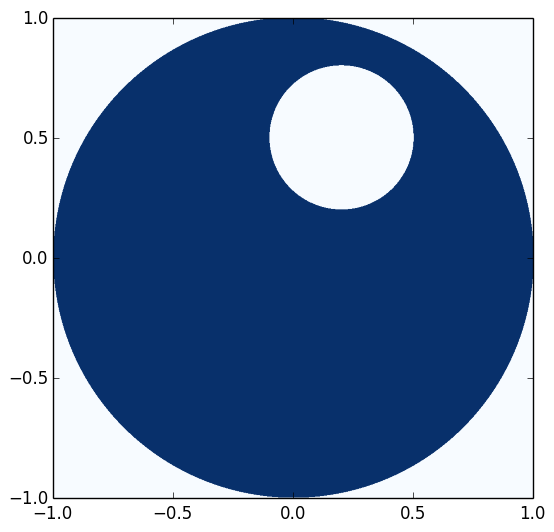

PyObject <matplotlib.image.AxesImage object at 0x31e3bd5d0>

In [14]:
C = Disk(1.0)- Disk(0.3,[0.2; 0.5]); FrameFuns.plot_domain(C, n=1000)

In [15]:
f(x,y) = exp(x+y)

f (generic function with 1 method)

In [16]:
F = ExpFun(f,C,)

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[16], in expression starting on line 1

In [17]:
f2(-0.6, 0.4)

LoadError: LoadError: MethodError: `f2` has no method matching f2(::Float64, ::Float64)
Closest candidates are:
  f2(::Any)
while loading In[17], in expression starting on line 1

In [18]:
exp(-0.6+0.4)

0.8187307530779819

In [19]:
plot_image(f2,n=200)

LoadError: LoadError: MethodError: `plot_image` has no method matching plot_image(::Function)
while loading In[19], in expression starting on line 1

In [20]:
plot_error(f2,f)

LoadError: LoadError: MethodError: `plot_error` has no method matching plot_error(::Function, ::Function)
Closest candidates are:
  plot_error(!Matched::FrameFuns.FrameFun{1,T}, ::Function)
  plot_error(!Matched::FrameFuns.FrameFun{2,T}, ::Function)
while loading In[20], in expression starting on line 1

##### Simple domains and harder functions

In [21]:
dom = FrameFuns.randomcircles(10)

a collection of 10 domains

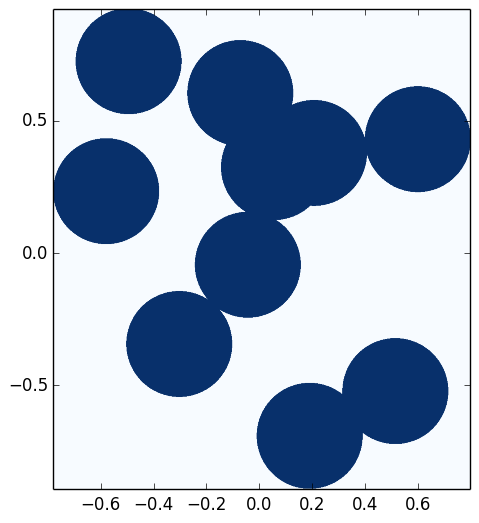

In [22]:
FrameFuns.plot_domain(dom,n=1000);

In [23]:
f2 = ExpFun( (x,y) -> cos(40*(x+y)), dom, n=(31,31), T=(1.2,1.2))

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[23], in expression starting on line 1

In [24]:
plot_image(f2,n=200)

LoadError: LoadError: MethodError: `plot_image` has no method matching plot_image(::Function)
while loading In[24], in expression starting on line 1

In [25]:
plot_error(f2, (x,y) -> cos(40*(x+y)))

LoadError: LoadError: MethodError: `plot_error` has no method matching plot_error(::Function, ::Function)
Closest candidates are:
  plot_error(!Matched::FrameFuns.FrameFun{1,T}, ::Function)
  plot_error(!Matched::FrameFuns.FrameFun{2,T}, ::Function)
while loading In[25], in expression starting on line 1

In [26]:
FrameFuns.BBox2

FrameFuns.BBox{2,T}

##### Fractal domains

In [27]:
mandelbrot=FrameFuns.Mandelbrot()

The Mandelbrot set

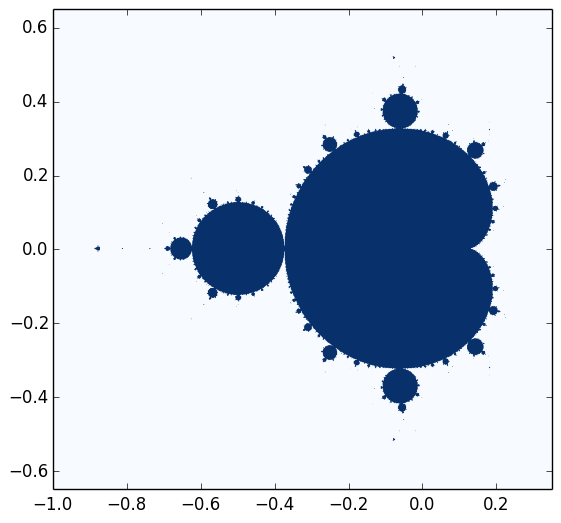

PyObject <matplotlib.image.AxesImage object at 0x329a147d0>

In [28]:
plot_domain(mandelbrot, n=1001)

In [29]:
f1 = ExpFun( (x,y) -> cos(x*y), mandelbrot)

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[29], in expression starting on line 1

In [30]:
plot_image(f1,n=201)

LoadError: LoadError: MethodError: `plot_image` has no method matching plot_image(::Function)
while loading In[30], in expression starting on line 1

In [31]:
plot_error(f1,(x,y) -> cos(x*y),n=201)

LoadError: LoadError: MethodError: `plot_error` has no method matching plot_error(::Function, ::Function)
Closest candidates are:
  plot_error(!Matched::FrameFuns.FrameFun{1,T}, ::Function)
  plot_error(!Matched::FrameFuns.FrameFun{2,T}, ::Function)
while loading In[31], in expression starting on line 1

In [32]:
julia = JuliaSet()

A particular Julia Set also known as the Douady rabbit

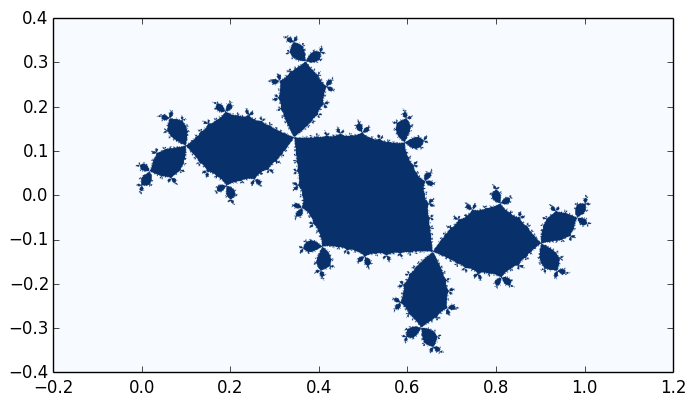

PyObject <matplotlib.image.AxesImage object at 0x329a29290>

In [33]:
plot_domain(julia)

In [34]:
f2 = ExpFun( (x,y) -> cos(10*x*y), julia, dof=31)

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[34], in expression starting on line 1

In [35]:
plot_image(f2)

LoadError: LoadError: MethodError: `plot_image` has no method matching plot_image(::Function)
while loading In[35], in expression starting on line 1

In [36]:
plot_error(f2, (x,y) -> cos(10*x*y))

LoadError: LoadError: MethodError: `plot_error` has no method matching plot_error(::Function, ::Function)
Closest candidates are:
  plot_error(!Matched::FrameFuns.FrameFun{1,T}, ::Function)
  plot_error(!Matched::FrameFuns.FrameFun{2,T}, ::Function)
while loading In[36], in expression starting on line 1

In [37]:
points=rand(10,2); methods(FrameFuns.)

LoadError: LoadError: syntax: invalid syntax: ")"
while loading In[37], in expression starting on line 1

### 3D approximations

##### Simple domains and simple functions

In [38]:
S = Sphere(1.0)

LoadError: LoadError: UndefVarError: Sphere not defined
while loading In[38], in expression starting on line 1

In [39]:
plot(S)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[39], in expression starting on line 1

In [40]:
f3 = ExpFun( (x,y,z) -> cos(x-2y+3z), Sphere(1.0), dof=5)

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[40], in expression starting on line 1

In [41]:
plot(f3)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[41], in expression starting on line 1

In [42]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[42], in expression starting on line 1

##### Harder domains

In [43]:
atom = atomium()

LoadError: LoadError: MethodError: `+` has no method matching +(::FixedSizeArrays.Vec{3,Float64}, ::Array{Float64,1})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
  +{S,T}(!Matched::Range{S}, ::AbstractArray{T,N})
  +(!Matched::SparseMatrixCSC{Tv,Ti<:Integer}, ::Array{T,N})
  ...
while loading In[43], in expression starting on line 1

In [44]:
plot(atomium, n=50)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[44], in expression starting on line 1

In [45]:
f3 = ExpFun( (x,y,z) -> cos(x+y-2*z), atomium, dof=5)

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[45], in expression starting on line 1

In [46]:
plot(f3)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[46], in expression starting on line 1

In [47]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[47], in expression starting on line 1

##### Harder functions?

In [48]:
f3 = ExpFun( (x,y,z) -> cos(40*(x+y-2*z)), unitsphere, dof=21, method="lsqr")

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[48], in expression starting on line 1

In [49]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[49], in expression starting on line 1

In [50]:
f3 = ExpFun( (x,y,z) -> cos(40*(x+y-2*z)), unitsphere, dof=51, method="lsqr")

LoadError: LoadError: UndefVarError: ExpFun not defined
while loading In[50], in expression starting on line 1